In [1]:
import numpy as np
import pickle
np.random.seed(7)  # for reproducibility


In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l2


Using TensorFlow backend.


In [3]:
import keras
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('tf')

In [4]:
import matplotlib.pyplot as plt
import os
import numpy

In [5]:
def unpickle(file):
    with open(file,'rb') as fo:
        dict=pickle.load(fo, encoding='bytes')
    data=dict['data']
    data = data.reshape((-1, 32, 32, 3))
    labels=dict['label']
    return data, labels

In [6]:
def saveTest(your_predict_labels):
    f=open('testlabel.pickle','rb')
    labels=pickle.load(f)
    f.close()
  #here you must replace the labels that you have predicted for the test set:
    for i in range(len(labels)):
        labels[i]=your_predict_labels[i]
  #save the pickle file that you should upload:
    f=open('testlabel.pickle','wb')
    pickle.dump(labels,f)
    f.close()

In [7]:
X_train_label, Y_train_label =unpickle("trainset.pickle")
print(X_train_label.shape)


(9000, 32, 32, 3)


In [8]:
X_validation_label, Y_validation_label=unpickle("validset.pickle")

In [9]:
f=open('testset.pickle','rb')
dict=pickle.load(f)
f.close()
X_test_label=dict['data']
X_test_label = X_test_label.reshape((-1, 32, 32, 3))
X_test = X_test_label.astype('float32')

print(X_test_label.shape)

(3000, 32, 32, 3)


In [10]:
f=open('testlabel.pickle','rb')
Y_test_label=pickle.load(f)
f.close()
Y_test=np_utils.to_categorical(Y_test_label, 10)


In [11]:
X_train = X_train_label.astype('float32')
X_validation = X_validation_label.astype('float32')


Y_train = np_utils.to_categorical(Y_train_label, 10)
Y_validation = np_utils.to_categorical(Y_validation_label, 10)
print(X_train.shape)
for i in range(20):
    print(Y_train[i])

(9000, 32, 32, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


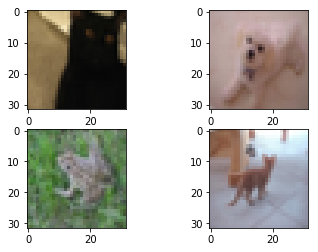

In [12]:
#image visualization
for i in range(4):
    img=X_train_label[i]
    img=img.reshape(-1,32,32).transpose([1,2,0])
    plt.subplot(2,2,i+1)
    plt.imshow(img)


In [13]:
# Parameter
num_classes = Y_train.shape[1]
batch_size = 32
epochs = 100
no_estimators = 5

In [14]:
# create CNN 6 conv layer & 2 Maxpooling layer 
def create_cnn_model():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3), activation='relu', border_mode='same'))
    model.add(BatchNormalization())    
    model.add(Dropout(0.2))
    model.add(Convolution2D(32, 3, 3, activation='relu', border_mode='same'))

    model.add(BatchNormalization())
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(64, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Convolution2D(128, 3, 3, activation='relu', border_mode='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
       
    model.add(Flatten())
    
   
    model.add(Dropout(0.2))
    model.add(Dense(1024, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    model.add(Dropout(0.2))
    model.add(Dense(512, activation='relu', W_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    
    
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))
    
    # Compile model
    model.compile(loss='categorical_crossentropy',optimizer='Adam', metrics=['accuracy'])
    return model

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu", padding="same")`
  app.launch_new_instance()
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update yo

Instructions for updating:
Use tf.cast instead.


C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 18s - loss: 10.8621 - acc: 0.4771 - val_loss: 2.6143 - val_acc: 0.5013
Epoch 2/100
 - 8s - loss: 1.8991 - acc: 0.5373 - val_loss: 1.5970 - val_acc: 0.4960
Epoch 3/100
 - 8s - loss: 1.5127 - acc: 0.5799 - val_loss: 1.2910 - val_acc: 0.6127
Epoch 4/100
 - 8s - loss: 1.3363 - acc: 0.6102 - val_loss: 1.5300 - val_acc: 0.5680
Epoch 5/100
 - 8s - loss: 1.3071 - acc: 0.6197 - val_loss: 1.3787 - val_acc: 0.5907
Epoch 6/100
 - 8s - loss: 1.2793 - acc: 0.6316 - val_loss: 1.4285 - val_acc: 0.5223
Epoch 7/100
 - 8s - loss: 1.2598 - acc: 0.6422 - val_loss: 1.2127 - val_acc: 0.6440
Epoch 8/100
 - 8s - loss: 1.2256 - acc: 0.6668 - val_loss: 1.6061 - val_acc: 0.6537
Epoch 9/100
 - 8s - loss: 1.2245 - acc: 0.6704 - val_loss: 1.2288 - val_acc: 0.6583
Epoch 10/100
 - 8s - loss: 1.2522 - acc: 0.6812 - val_loss: 1.1821 - val_acc: 0.6657
Epoch 11/100
 - 8s - loss: 1.2001 - acc: 0.6906 - val_loss: 1.1866 - val_acc: 0.6583
Epoch 12/100
 - 8s - los

Epoch 97/100
 - 8s - loss: 0.2183 - acc: 0.9719 - val_loss: 1.6075 - val_acc: 0.6940
Epoch 98/100
 - 8s - loss: 0.2199 - acc: 0.9719 - val_loss: 1.4844 - val_acc: 0.7150
Epoch 99/100
 - 8s - loss: 0.2456 - acc: 0.9707 - val_loss: 1.6642 - val_acc: 0.6897
Epoch 100/100
 - 8s - loss: 0.2258 - acc: 0.9720 - val_loss: 1.3936 - val_acc: 0.7210
3000/3000 [==============================] - 0s 165us/step

Test Accuracy: 0.7950


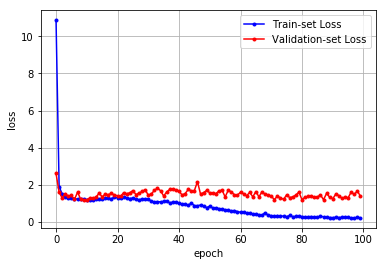

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 16s - loss: 10.7813 - acc: 0.4821 - val_loss: 2.4926 - val_acc: 0.5633
Epoch 2/100
 - 8s - loss: 1.9323 - acc: 0.5456 - val_loss: 1.4870 - val_acc: 0.5890
Epoch 3/100
 - 8s - loss: 1.4801 - acc: 0.5793 - val_loss: 1.3148 - val_acc: 0.6053
Epoch 4/100
 - 8s - loss: 1.3544 - acc: 0.5961 - val_loss: 1.7588 - val_acc: 0.4940
Epoch 5/100
 - 8s - loss: 1.2945 - acc: 0.6197 - val_loss: 1.3185 - val_acc: 0.6227
Epoch 6/100
 - 8s - loss: 1.2530 - acc: 0.6338 - val_loss: 1.2611 - val_acc: 0.6103
Epoch 7/100
 - 8s - loss: 1.2345 - acc: 0.6527 - val_loss: 1.2728 - val_acc: 0.6177
Epoch 8/100
 - 8s - loss: 1.2145 - acc: 0.6633 - val_loss: 1.4588 - val_acc: 0.5943
Epoch 9/100
 - 8s - loss: 1.2192 - acc: 0.6741 - val_loss: 1.1776 - val_acc: 0.6430
Epoch 10/100
 - 8s - loss: 1.1650 - acc: 0.6914 - val_loss: 1.2997 - val_acc: 0.6723
Epoch 11/100
 - 8s - loss: 1.1921 - acc: 0.6992 - val_loss: 1.2560 - val_acc: 0.6487
Epoch 12/100
 - 8s - los

Epoch 97/100
 - 8s - loss: 0.2126 - acc: 0.9713 - val_loss: 1.3881 - val_acc: 0.7190
Epoch 98/100
 - 8s - loss: 0.2440 - acc: 0.9687 - val_loss: 1.3459 - val_acc: 0.7303
Epoch 99/100
 - 8s - loss: 0.2259 - acc: 0.9728 - val_loss: 1.4084 - val_acc: 0.7187
Epoch 100/100
 - 8s - loss: 0.2147 - acc: 0.9733 - val_loss: 1.3698 - val_acc: 0.7210
3000/3000 [==============================] - 0s 163us/step

Test Accuracy: 0.8113


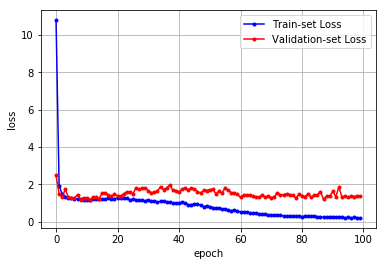

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 16s - loss: 11.0881 - acc: 0.4861 - val_loss: 2.6939 - val_acc: 0.4537
Epoch 2/100
 - 8s - loss: 1.8548 - acc: 0.5412 - val_loss: 1.4699 - val_acc: 0.5643
Epoch 3/100
 - 8s - loss: 1.4195 - acc: 0.5767 - val_loss: 1.3621 - val_acc: 0.5567
Epoch 4/100
 - 8s - loss: 1.3360 - acc: 0.5973 - val_loss: 1.2863 - val_acc: 0.5877
Epoch 5/100
 - 8s - loss: 1.2418 - acc: 0.6228 - val_loss: 1.2367 - val_acc: 0.6317
Epoch 6/100
 - 8s - loss: 1.2229 - acc: 0.6277 - val_loss: 1.2499 - val_acc: 0.5477
Epoch 7/100
 - 8s - loss: 1.2216 - acc: 0.6496 - val_loss: 1.3204 - val_acc: 0.6133
Epoch 8/100
 - 8s - loss: 1.2136 - acc: 0.6709 - val_loss: 1.1470 - val_acc: 0.6437
Epoch 9/100
 - 8s - loss: 1.1704 - acc: 0.6736 - val_loss: 1.2195 - val_acc: 0.6530
Epoch 10/100
 - 8s - loss: 1.1780 - acc: 0.6833 - val_loss: 1.1758 - val_acc: 0.6860
Epoch 11/100
 - 8s - loss: 1.2077 - acc: 0.6988 - val_loss: 1.1683 - val_acc: 0.6727
Epoch 12/100
 - 8s - los

Epoch 97/100
 - 8s - loss: 0.2513 - acc: 0.9704 - val_loss: 1.5835 - val_acc: 0.6920
Epoch 98/100
 - 8s - loss: 0.3074 - acc: 0.9669 - val_loss: 1.3099 - val_acc: 0.7160
Epoch 99/100
 - 8s - loss: 0.2378 - acc: 0.9707 - val_loss: 1.4365 - val_acc: 0.7113
Epoch 100/100
 - 8s - loss: 0.2209 - acc: 0.9734 - val_loss: 1.5309 - val_acc: 0.7113
3000/3000 [==============================] - 0s 164us/step

Test Accuracy: 0.8093


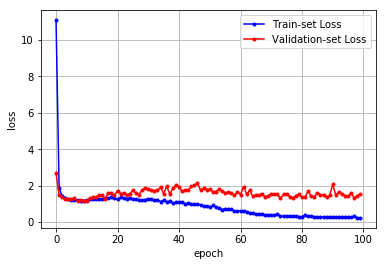

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 16s - loss: 10.6942 - acc: 0.4744 - val_loss: 2.5369 - val_acc: 0.5003
Epoch 2/100
 - 8s - loss: 1.8926 - acc: 0.5501 - val_loss: 1.8617 - val_acc: 0.4240
Epoch 3/100
 - 8s - loss: 1.4685 - acc: 0.5743 - val_loss: 1.5685 - val_acc: 0.5313
Epoch 4/100
 - 8s - loss: 1.3238 - acc: 0.6027 - val_loss: 1.4139 - val_acc: 0.5673
Epoch 5/100
 - 8s - loss: 1.3138 - acc: 0.6193 - val_loss: 1.2916 - val_acc: 0.6030
Epoch 6/100
 - 8s - loss: 1.2624 - acc: 0.6414 - val_loss: 1.2089 - val_acc: 0.6447
Epoch 7/100
 - 8s - loss: 1.2352 - acc: 0.6414 - val_loss: 1.2076 - val_acc: 0.6340
Epoch 8/100
 - 8s - loss: 1.2132 - acc: 0.6653 - val_loss: 1.2242 - val_acc: 0.6233
Epoch 9/100
 - 8s - loss: 1.1794 - acc: 0.6751 - val_loss: 1.0836 - val_acc: 0.6687
Epoch 10/100
 - 8s - loss: 1.1808 - acc: 0.6866 - val_loss: 1.1991 - val_acc: 0.6087
Epoch 11/100
 - 8s - loss: 1.2153 - acc: 0.6938 - val_loss: 1.3395 - val_acc: 0.6487
Epoch 12/100
 - 8s - los

Epoch 97/100
 - 8s - loss: 0.2326 - acc: 0.9694 - val_loss: 1.3914 - val_acc: 0.7200
Epoch 98/100
 - 8s - loss: 0.2270 - acc: 0.9710 - val_loss: 1.3886 - val_acc: 0.7213
Epoch 99/100
 - 8s - loss: 0.2524 - acc: 0.9700 - val_loss: 1.4240 - val_acc: 0.7187
Epoch 100/100
 - 8s - loss: 0.2285 - acc: 0.9708 - val_loss: 1.5480 - val_acc: 0.7157
3000/3000 [==============================] - 1s 168us/step

Test Accuracy: 0.8040


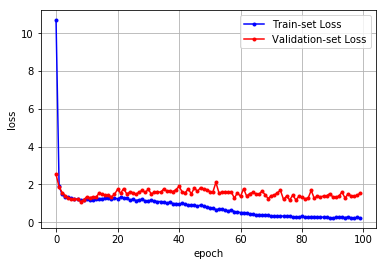

Train on 9000 samples, validate on 3000 samples
Epoch 1/100
 - 17s - loss: 10.8801 - acc: 0.4870 - val_loss: 2.4493 - val_acc: 0.5840
Epoch 2/100
 - 8s - loss: 1.8792 - acc: 0.5427 - val_loss: 1.4696 - val_acc: 0.5473
Epoch 3/100
 - 8s - loss: 1.4333 - acc: 0.5708 - val_loss: 1.5083 - val_acc: 0.5073
Epoch 4/100
 - 8s - loss: 1.3185 - acc: 0.6023 - val_loss: 1.2970 - val_acc: 0.6043
Epoch 5/100
 - 8s - loss: 1.2736 - acc: 0.6180 - val_loss: 1.5108 - val_acc: 0.5200
Epoch 6/100
 - 8s - loss: 1.2446 - acc: 0.6336 - val_loss: 1.2592 - val_acc: 0.5960
Epoch 7/100
 - 8s - loss: 1.2056 - acc: 0.6562 - val_loss: 1.4852 - val_acc: 0.5037
Epoch 8/100
 - 8s - loss: 1.2344 - acc: 0.6622 - val_loss: 1.4323 - val_acc: 0.6097
Epoch 9/100
 - 8s - loss: 1.1935 - acc: 0.6777 - val_loss: 1.2560 - val_acc: 0.6693
Epoch 10/100
 - 8s - loss: 1.1619 - acc: 0.6939 - val_loss: 1.2733 - val_acc: 0.6490
Epoch 11/100
 - 8s - loss: 1.1916 - acc: 0.6949 - val_loss: 1.2334 - val_acc: 0.6847
Epoch 12/100
 - 8s - los

Epoch 97/100
 - 8s - loss: 0.2499 - acc: 0.9682 - val_loss: 1.2344 - val_acc: 0.7280
Epoch 98/100
 - 8s - loss: 0.2221 - acc: 0.9713 - val_loss: 1.3860 - val_acc: 0.7127
Epoch 99/100
 - 8s - loss: 0.2676 - acc: 0.9667 - val_loss: 1.6137 - val_acc: 0.7050
Epoch 100/100
 - 8s - loss: 0.2707 - acc: 0.9669 - val_loss: 1.3735 - val_acc: 0.7137
3000/3000 [==============================] - 0s 163us/step

Test Accuracy: 0.8000


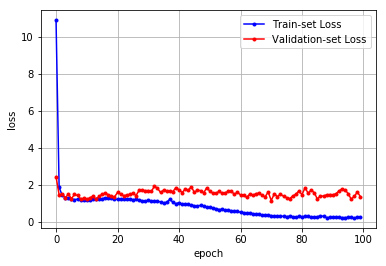

In [15]:
## ENSEMBLE MODELS
# Train many CNN models
for i in np.arange(no_estimators):
    # check point to save best model
    checkpoint = keras.callbacks.ModelCheckpoint('models_11/model_'+str(i)+'.h5', monitor='val_acc', \
            verbose=0, save_best_only=True, save_weights_only=True, mode='auto')
    # clear GPU memory
    model = None
    K.clear_session()
    
    # train model
    model = create_cnn_model()
    history=model.fit(X_train, Y_train, validation_data=(X_validation, Y_validation), nb_epoch=100, \
                batch_size=32, verbose=2, callbacks=[checkpoint])
    print("\nTest Accuracy: {:.4f}".format(model.evaluate(X_test, Y_test)[1]))
    y_vloss=history.history['val_loss']
    y_loss=history.history['loss']
    
    x_len=numpy.arange(len(y_loss))
    plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")
    plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
    
    plt.legend(loc='upper right')
    plt.grid()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

In [16]:
# Check individual scores - val_acc and get list of the best models
score_list = []
score_list2 = []
score_list3=[]
model = create_cnn_model()
for i in np.arange(no_estimators):    
    model.load_weights('models_11/model_'+str(i)+'.h5')
    scores3= model.evaluate(X_test, Y_test, verbose=0)
    scores2= model.evaluate(X_train, Y_train, verbose=0)
    scores = model.evaluate(X_validation, Y_validation, verbose=0)
    score_list.append(scores[1])   #validation Acc
    score_list2.append(scores2[1])    #Train Acc
    score_list3.append(scores3[1])  #Test Acc
score_list = np.array(score_list)
score_list2= np.array(score_list2)
score_list3= np.array(score_list3)
score_list_filter = score_list >= 0.73 # threshold to select best model
print("Train Acc: "+str(score_list2))
print("Validation Acc: "+ str(score_list))
print("Test Acc: "+ str(score_list3))

print(score_list_filter)

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Train Acc: [0.99611111 0.98733333 0.99533333 0.99622222 0.99744444]
Validation Acc: [0.738      0.733      0.72533333 0.73       0.73      ]
Test Acc: [0.825      0.793      0.82633333 0.80866667 0.81166667]
[ True  True False  True False]


In [17]:
# Ensemble predictions ~ val_err 16%
predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
predictions_test=np.zeros((Y_test.shape[0],Y_test.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False:
        continue
    #validation
    model.load_weights('models_11/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_validation, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]
    #Test
    prediction_test = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot_test = np_utils.to_categorical(prediction_test, 10)
    predictions_test = predictions_test + prediction_onehot_test*score_list3[i]

predictions_label = np.argmax(predictions, axis=1)
evaluate = np.equal(predictions_label, Y_validation_label)

predictions_label_test = np.argmax(predictions_test, axis=1)
evaluate_test = np.equal(predictions_label_test, Y_test_label)

print("Ensemble Validation_Error: %.2f%%" % (100-np.mean(evaluate)*100))
print("Ensemble Validation_Accuracy: %.2f%%" % (np.mean(evaluate)*100))

print("Ensemble Test_Error: %.2f%%" % (100-np.mean(evaluate_test)*100))
print("Ensemble Test_Accuracy: %.2f%%" % (np.mean(evaluate_test)*100))

C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
  after removing the cwd from sys.path.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", padding="same")`
  import sys
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu", padding="same")`
  
C:\Users\PEM\Anaconda3\envs\bms-tf(gpu)\lib\site-packages\ipykernel_l

Ensemble Validation_Error: 23.77%
Ensemble Validation_Accuracy: 76.23%
Ensemble Test_Error: 14.20%
Ensemble Test_Accuracy: 85.80%


In [ ]:
## PERFORM PREDICTION ON TEST SET

X_test = X_test_label.astype('float32')

predictions = np.zeros((Y_validation.shape[0],Y_validation.shape[1]))
model = create_cnn_model()
for i in np.arange(no_estimators): 
    if score_list_filter[i] == False: # skip bad model
        continue
    model.load_weights('models_11/model_'+str(i)+'.h5')
    prediction = model.predict_classes(X_test, batch_size=200, verbose=0)
    prediction_onehot = np_utils.to_categorical(prediction, 10)
    predictions = predictions + prediction_onehot*score_list[i]

predictions_label = np.argmax(predictions, axis=1)
output = predictions_label.tolist()

with open('testlabel.pickle','wb') as f:
    pickle.dump(output, f)

pred = model.evaluate(X_test, Y_test)
print("test loss: ",pred[0]+"test acc: ",pred[1])